In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import itertools
import numpy as np


# Select case

In [ ]:
lr_pres =  [1e-3]   #[1e-2, 1e-3]
lr_posts =  [1e-3]  #[1e-2]
lrs = [1e-2]

z0s = [45] #[36]#[30,32,34,38]  #[30, 34, 38]
v0s = [20] # [20]#[20,22,24,26]
funcs = ["step", "sin", "square"]

cases = len(list(itertools.product(lr_pres, lr_posts, z0s, v0s)))
f, ax = plt.subplots(cases, 3, figsize = (33,cases*8))



t_min = 0
t_max = -1#1000
i = 0
data_dir = '../data/elm'
for lr_pre, lr_post, z0, v0 in itertools.product(lr_pres, lr_posts, z0s, v0s):
    for j, func in enumerate(funcs):
        fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
        path = os.path.join(data_dir, fn)
        df = pd.read_csv(path)
        
        #ax[i,j].axhline(y=0., color='r', linestyle='-')
        ax[i,j].plot(df['h'][t_min:t_max])
        #ax[i,j].plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values), linewidth=4,linestyle='dashed')
        #ax[i,j].plot(df['dhe'][t_min:t_max], linewidth=3)
        ax[i,j].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
        #ax[i,j].set_ylim([-2,2])
    i+=1

i = 0
data_dir = '../data/dummy'
for lr_pre, lr_post, z0, v0 in itertools.product(lr_pres, lr_posts, z0s, v0s):
    for j, func in enumerate(funcs):
        fn = "z0_{}_v0_{}_func_{}.csv".format(z0, v0, func)
        path = os.path.join(data_dir, fn)
        df = pd.read_csv(path)
        
        #ax[i,j].axhline(y=0., color='r', linestyle='-')
        ax[i,j].plot(1.8*df['v'][t_min:t_max])
        #ax[i,j].plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values),linewidth=4,linestyle='dashed')
        #ax[i,j].plot(df['dhe'][t_min:t_max], linewidth=3)
        ax[i,j].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
        #ax[i,j].set_ylim([-2,2])
    i+=1
    
    
i = 0
data_dir = '../data/sgd'
for lr, z0, v0 in itertools.product(lrs, z0s, v0s):
    for j, func in enumerate(funcs):
        fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
        path = os.path.join(data_dir, fn)
        df = pd.read_csv(path)
        
        #ax[i,j].axhline(y=0., color='r', linestyle='-')
        ax[i,j].plot(df['h'][t_min:t_max])
        #ax[i,j].plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values),linewidth=4,linestyle='dashed')
        #ax[i,j].plot(df['dhe'][t_min:t_max], linewidth=3)
        ax[i,j].legend(['elm','dummy','sgd'], fontsize = 14)
        
        ax[i,j].set_title("lr:{},z0:{},v0:{},func:{}".format(lr, z0, v0, func), fontsize = 20)
        #ax[i,j].set_ylim([-0.5,0.5])

        
    i=i+1

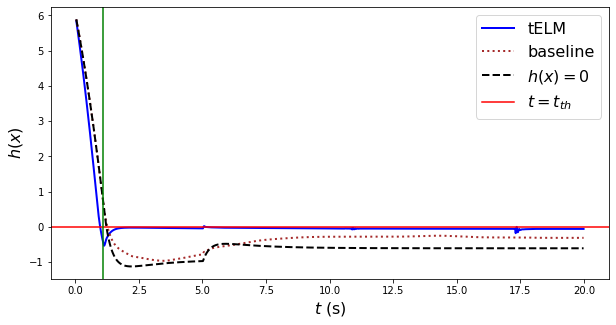

In [76]:
lr_pres =  [1e-3]   #[1e-2, 1e-3]
lr_posts =  [1e-2]  #[1e-2]
z0s = [42] #[28,30,32,34,38] #[36]#[30,32,34,38]  #[30, 34, 38]
v0s = [20]#,17,19,20]
funcs = ["step"] # Square or sin
 
# Path for saving data
data_dir = '../data/elm'
data_dir_dummy = '../data/dummy'
data_dir_sgd= '../data/sgd'
 
t_init = 3
t_end = -1
f, ax = plt.subplots(1,1, figsize = (10,5))
 
t_spc = np.arange(0.04,20,0.01)
 
 
i = 0
for lr_pre, lr_post, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
   fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
   path = os.path.join(data_dir, fn)
   fn = "z0_{}_v0_{}_func_{}.csv".format(z0, v0, func)
   path_dummy =  os.path.join(data_dir_dummy, fn)
   df = pd.read_csv(path)       
   #ax.plot(t_spc, df['v'][t_init:t_end], color = 'blue', linestyle = "-", linewidth = 2)
   #ax.plot(t_spc, df['v_lead'][t_init:t_end], color = 'orange', linestyle = "-", linewidth = 2)
   ax.plot(t_spc, df['h'][t_init:t_end], color = 'blue', linestyle = "-", linewidth = 2)


   fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
   path_sgd =  os.path.join(data_dir_sgd, fn)
   df_sgd = pd.read_csv(path_sgd)

   #ax.plot(t_spc, 10*df['u'][t_init:t_end], color = 'orange', linestyle = "-", linewidth = 2)

   df_dummy = pd.read_csv(path_dummy)
   ax.plot(t_spc, df_sgd['h'][t_init:t_end], color = 'brown', linestyle = ":", linewidth = 2)
   ax.plot(t_spc, df_dummy['h'][t_init:t_end], color = 'black', linestyle = "--", linewidth = 2)# - df['dhe_real'][t_init:t_end])
   
   #ax[i].plot(df_dummy['h'][t_init:t_end])# - df_dummy['dhe_real'][t_init:t_end])
   #ax[i].plot(df['dhe_real'][t_init:t_end])
   #ax[i].set_ylim([-1,1])
   ax.axhline(y=0, color='r', linestyle='-')
   ax.axvline(x=110*0.01, color='green', linestyle='-')
   ax.set_ylabel(r'$h(x)$', fontsize = 16)
   ax.set_xlabel(r'$t$ (s)', fontsize = 16)
   ax.legend(["tELM", "baseline","$h(x)=0$","$t=t_{th}$"], fontsize = 16)
   #ax.xticks(fontsize=14)
   #ax.yticks(fontsize=14)
   plt.tick_params(axis = "both", which="minor", labelsize = 12)
   i+=1
 
f.savefig("num_step_h.pdf")
  


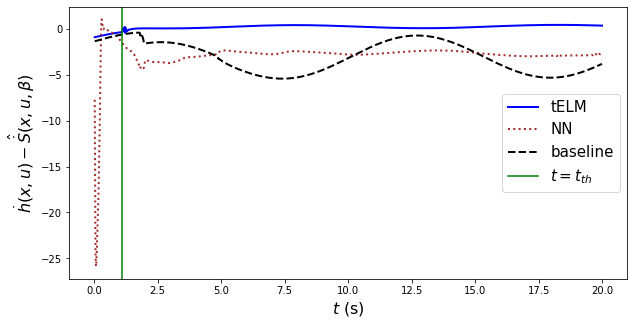

In [77]:
lr_pres =  [1e-3]   #[1e-2, 1e-3]
lr_posts =  [1e-3]  #[1e-2]
lr = 1e-2
z0s = [42] #[28,30,32,34,38] #[36]#[30,32,34,38]  #[30, 34, 38]
v0s = [20]#,17,19,20]
funcs = ["sin"] # Square or sin
 
# Path for saving data
data_dir = '../data/elm'
data_dir_dummy = '../data/dummy'
data_dir_sgd= '../data/sgd'

t_init = 2
t_end = -1
f, ax = plt.subplots(1,1, figsize = (10,5))
 
t_spc = np.arange(0.03,20,0.01)
 
 
i = 0
for lr_pre, lr_post, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
   fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
   path = os.path.join(data_dir, fn)
   df = pd.read_csv(path)       

   fn = "z0_{}_v0_{}_func_{}.csv".format(z0, v0, func)
   path_dummy =  os.path.join(data_dir_dummy, fn)
   df_dummy = pd.read_csv(path_dummy)

   fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
   path_sgd =  os.path.join(data_dir_sgd, fn)
   df_sgd = pd.read_csv(path_sgd)

   ax.plot(t_spc, df['dhe_real'][t_init:t_end] - df['dhe'][t_init:t_end], color = 'blue', linestyle = "-", linewidth = 2)
   ax.plot(t_spc, df_sgd['dhe_real'][t_init:t_end] - df_sgd['dhe'][t_init:t_end], color = 'brown', linestyle = ":", linewidth = 2)
   ax.plot(t_spc, df_dummy['dhe_real'][t_init:t_end] - df_dummy['dhe'][t_init:t_end], color = 'black', linestyle = "--", linewidth = 2)
   #ax.plot(t_spc, df['dhe'][t_init:t_end], color = 'blue', linestyle = "-", linewidth = 2)
   #ax.plot(t_spc, df['dhe_real'][t_init:t_end], color = 'green', linestyle = "-", linewidth = 2)
   #ax.plot(t_spc, df_dummy['dhe_real'][t_init:t_end] - df_dummy['dhe'][t_init:t_end], color = 'black', linestyle = "--", linewidth = 2)# - df['dhe_real'][t_init:t_end])
   #ax.plot(t_spc, df_dummy['dhe'][t_init:t_end], color = 'black', linestyle = "--", linewidth = 2)# - df['dhe_real'][t_init:t_end])
   #ax[i].plot(df_dummy['h'][t_init:t_end])# - df_dummy['dhe_real'][t_init:t_end])
   #ax[i].plot(df['dhe_real'][t_init:t_end])
   #ax[i].set_ylim([-1,1])
   #ax.axhline(y=0, color='r', linestyle='-')
   ax.axvline(x=110*0.01, color='green', linestyle='-')
   ax.set_ylabel(r'$ \dot{h}(x,u) - \hat{\dot{S}}(x,u,\beta)$', fontsize = 16)
   ax.set_xlabel(r'$t$ (s)', fontsize = 16)
   ax.legend(["tELM", "NN","baseline","$t=t_{th}$"], fontsize = 15, loc ="center right")
   #ax.xticks(fontsize=14) "$\widetilde{\dot{h}}(x,u)=0$",
   #ax.yticks(fontsize=14)
   plt.tick_params(axis = "both", which="minor", labelsize = 12)
   i+=1
 
f.savefig("num_step_dhe.pdf")


# Plot 1: dot{h}

In [ ]:
cases = ['elm', 'sgd','oDA_elm', "oFW_elm", "dummy"]
cases = ['elm', 'sgd', 'dummy']

In [ ]:
func_name = "step"

f, ax = plt.subplots(1,1,figsize = (17,8))

dir_name = "../data/exp"

t_min = 3
t_max = -1

for i, case in enumerate(cases):
    df = pd.read_csv("{}/{}_{}.csv".format(dir_name, case, func_name))

    ax.set_title('$\widetilde{\dot{h}}$', fontsize = 18)

    # First plot 
    ax.plot(np.abs(df['dhe_real'][t_min:t_max].values - df['dhe'][t_min:t_max].values))
    #ax[i,0].plot(, 'k')
    ax.set_title('$\widetilde{\dot{h}}_{est}-\widehat{\dot{h}}_{real}$', fontsize = 18)
    ax.legend(cases, fontsize = 18)



In [ ]:
func_name = "step"
f, ax = plt.subplots(5,3,figsize = (27,35))

dir_name = "../data/exp"

t_min = 3
t_max = -1

for i, case in enumerate(cases):
    df = pd.read_csv("{}/{}_{}.csv".format(dir_name, case, func_name))

    ax[i,0].set_title('$\widetilde{\dot{h}}$', fontsize = 18)

    # First plot 
    ax[i,0].plot(df['dhe_real'][t_min:t_max] - df['dhe'][t_min:t_max], 'r')
    #ax[i,0].plot(, 'k')
    ax[i,0].legend(['$\widetilde{\dot{h}}_{est}$','$\widehat{\dot{h}}_{real}$'], fontsize = 18)

    # Second plot
    ax[i,1].set_title('CBF', fontsize = 18)
    ax[i,1].plot(df['h'][t_min:t_max], 'b')

    # Third plot
    ax[i,2].set_title('Distance', fontsize = 18)

    ax[i,2].plot(df['z'][t_min:t_max], 'b')
    v = df['v'][t_min:t_max]
    ax[i,2].plot(1.8*v, linewidth=3, color = 'k')
    ax[i,2].legend(['$z$', 'safe $z$'], fontsize = 18)


pad = 5
for axy, row in zip(ax[:,0], cases):
    axy.annotate(row,xy=(0, 0.5), xytext=(-axy.yaxis.labelpad-pad,0),                    
                xycoords=axy.yaxis.label, textcoords='offset points',
                size=20, ha='right', va='center')
